# AdaBoost Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Data Set form openml

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml("adult", version=2, as_frame=True)
dataset = data.frame

# Select features and Target variable i.e. x and y

In [3]:
x = dataset.drop(columns= ["class"])
y = dataset["class"]

# One-hot encode categorical variables

In [ ]:
x = pd.get_dummies(x, drop_first=True) # Brata why get dummies ? come to dagestan,no dummies

# Convert target variable to binary labels (<=50K: 0, >50K: 1)

In [6]:
y = (y == ">50K").astype(int)

# PreProcess and split the data in Train and Test modules

In [7]:

x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [8]:
adaboost_clf = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the Module by fit

In [9]:
adaboost_clf.fit(x_train, y_train)

c:\Users\abhin\anaconda3\envs\Jupiter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Make Predictions

In [10]:
y_pred = adaboost_clf.predict(x_test)

# Evaluation using accuracy score and classification report

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8257012215928479

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     11233
           1       0.62      0.65      0.63      3420

    accuracy                           0.83     14653
   macro avg       0.76      0.76      0.76     14653
weighted avg       0.83      0.83      0.83     14653


Confusion Matrix:
 [[9879 1354]
 [1200 2220]]


# Visualize the model

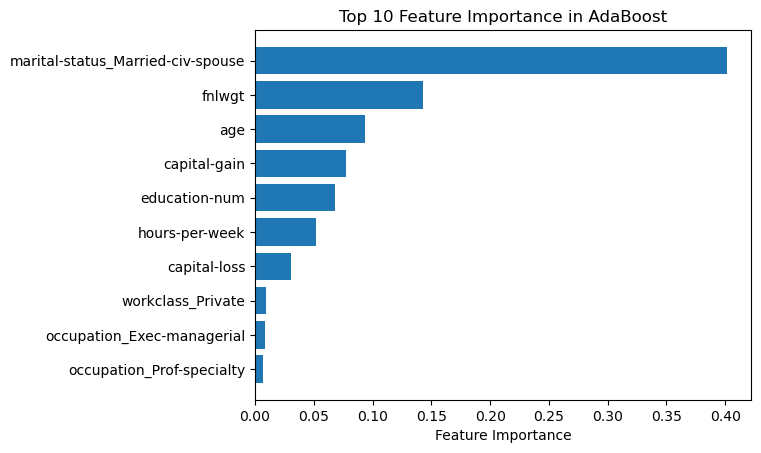

In [13]:
import matplotlib.pyplot as plt

feature_importances = adaboost_clf.feature_importances_
top_features = np.argsort(feature_importances)[-10:]  # Get indices of the top 10 important features

plt.barh(range(len(top_features)), feature_importances[top_features], align="center")
plt.yticks(range(len(top_features)), np.array(x.columns)[top_features])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importance in AdaBoost")
plt.show()